In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
df_iris = sns.load_dataset('iris')
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


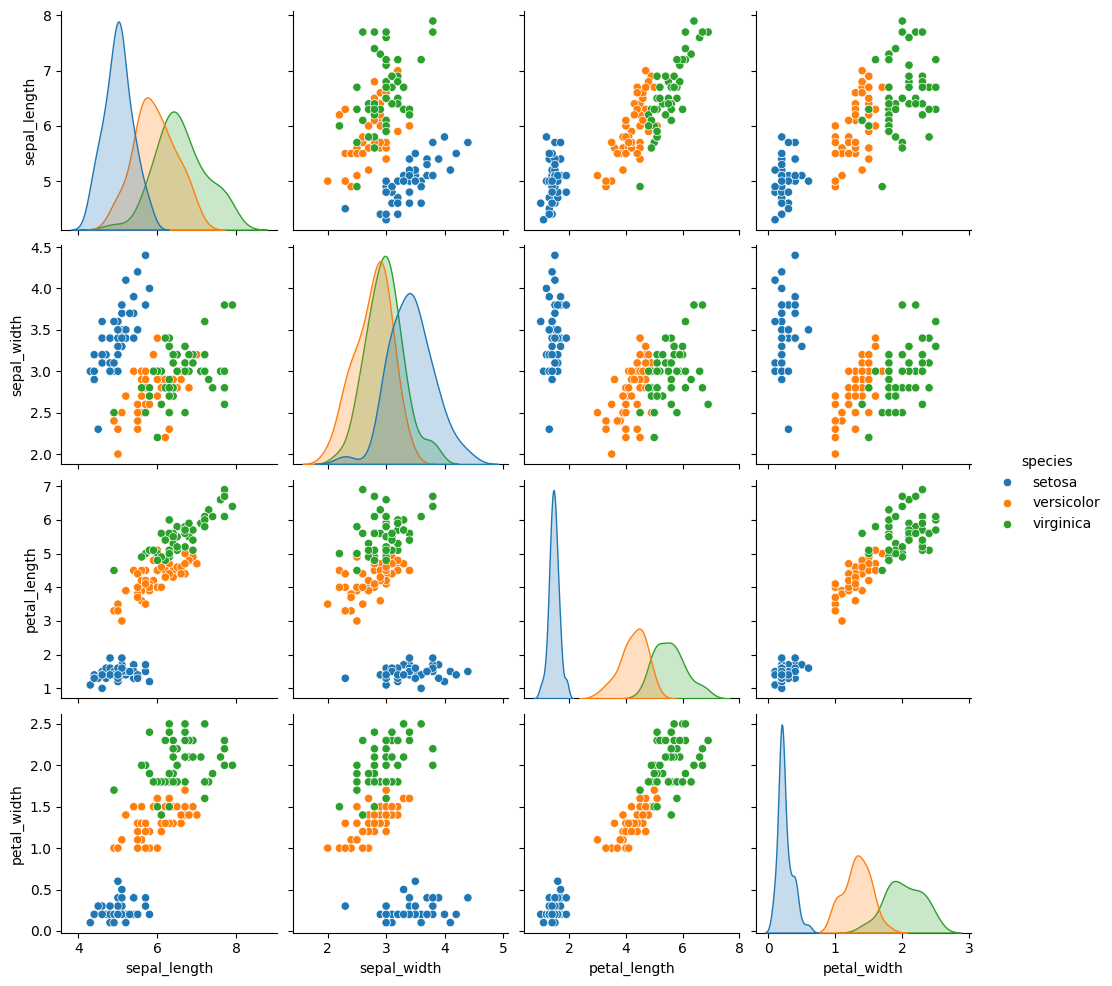

In [5]:
sns.pairplot(df_iris, hue='species')

# Calculating Correlations

In [ ]:
df_iris.drop(columns=['species']).corr(method='pearson').style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


The strongest correlation happens betwen petal_width and petal_length. On the plot it is visible that the points are very close to a straight line. Other two most corelated pairs of features are petal_length and petal_width with sepal_length. Sepal width is not correlated with any other feature, and we can observe that the points are scattered all over the plot.

In [11]:
features_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x_iris = df_iris.loc[:, features_iris].values

In [12]:
y_iris = df_iris.loc[:,['species']].values

In [13]:
x_iris = StandardScaler().fit_transform(x_iris)

In [14]:
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['species'] = df_iris['species']
df_iris_standarize.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
5,-0.537178,1.939791,-1.169714,-1.052180,setosa
6,-1.506521,0.788808,-1.340227,-1.183812,setosa
7,-1.021849,0.788808,-1.283389,-1.315444,setosa
8,-1.748856,-0.362176,-1.340227,-1.315444,setosa
9,-1.143017,0.098217,-1.283389,-1.447076,setosa


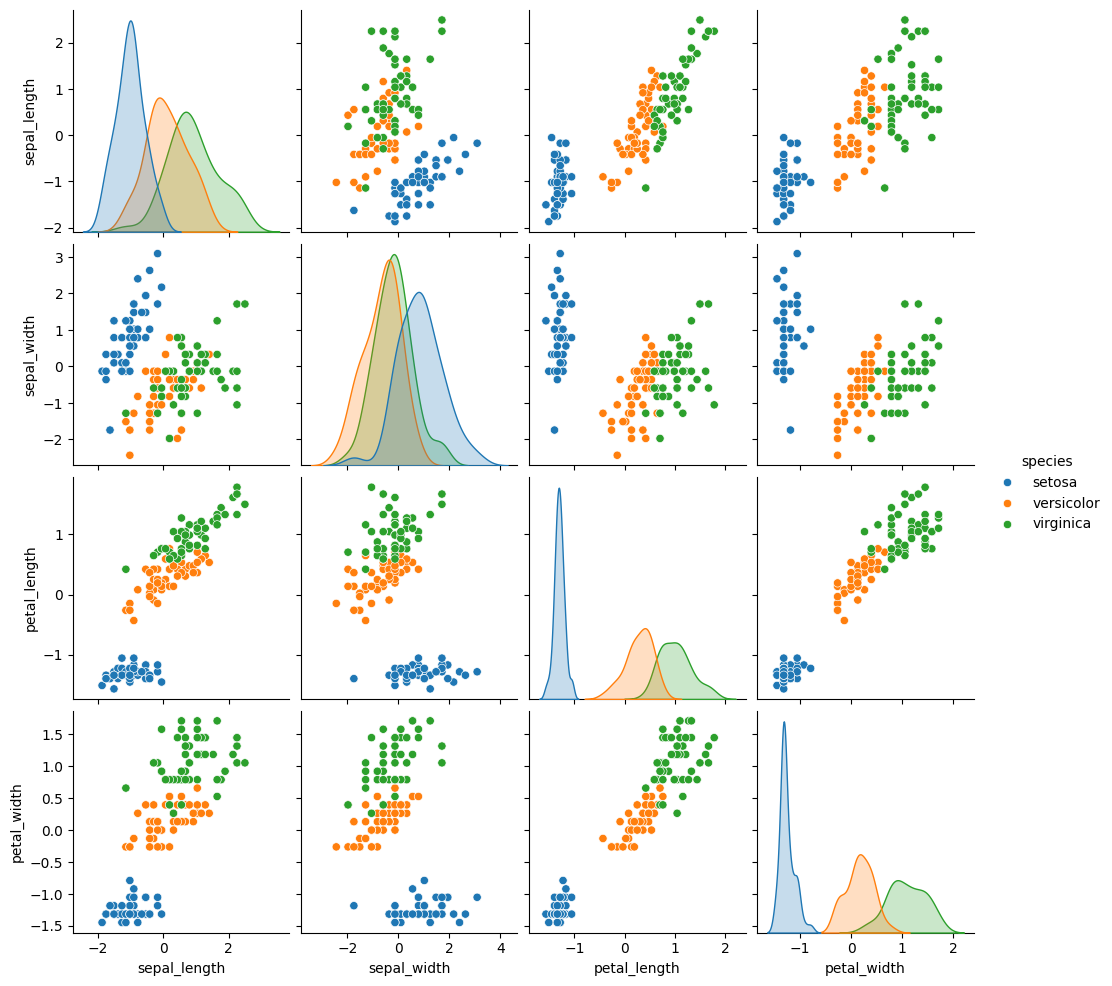

In [15]:
sns.pairplot(df_iris_standarize, hue='species')

In [16]:
df_iris_standarize.drop(columns=['species']).corr(method='pearson').style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [17]:
pca_iris = PCA(n_components=2)

In [18]:
principalComponents_iris = pca_iris.fit_transform(x_iris)

In [ ]:
principalDf_iris = pd.DataFrame(data = principalComponents_iris ,columns = ['principal component 1', 'principal component 2'])

In [20]:
finalDf_iris = pd.concat([principalDf_iris, df_iris[['species']]], axis = 1)
finalDf_iris.head(15)

,principal component 1,principal component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
5,-2.075631,1.489178,setosa
6,-2.444029,0.047644,setosa
7,-2.232847,0.223148,setosa
8,-2.334640,-1.115328,setosa
9,-2.184328,-0.469014,setosa


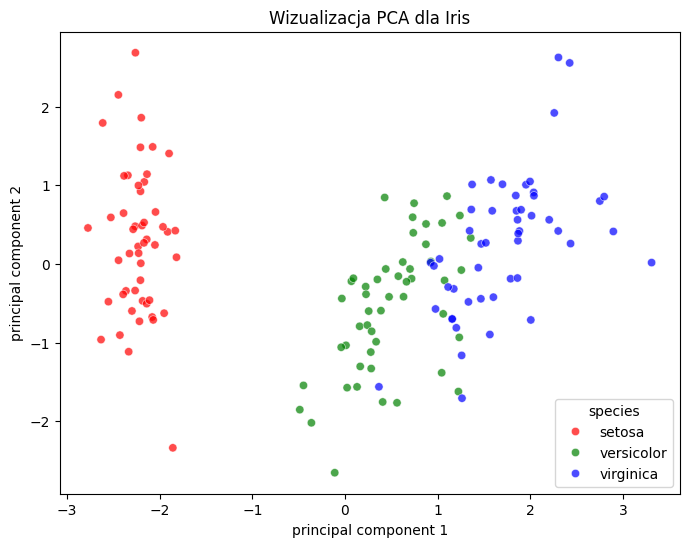

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=finalDf_iris['principal component 1'],
                y=finalDf_iris['principal component 2'],
                hue=finalDf_iris['species'],
                palette=['red', 'green', 'blue'],
                alpha=0.7)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Wizualizacja PCA dla Iris')
plt.show()

In [22]:
pca_iris.explained_variance_ratio_

array([0.72962445, 0.22850762])